In [66]:
import numpy as np
import scipy.linalg as spla
import matplotlib as mpl
import matplotlib.pyplot as plt

# Partícula en una caja
En primer lugar vamos a trabajar con el más sencillo de los sistemas cuantizados que hemos estudiado en el Tema 3 de la asignatura de Química Física II, la partícula en una caja de longitud $L$. Recordemos que en este sistema tenemos un potencial $V=\infty$ fuera de los límites de la caja y ningún potencial dentro de ella. La función de onda es $\psi=0$ entre $-\infty$ y $0$ y entre $L$ y $\infty$, mientras que entre $0$ y $L$ está descrita por $\psi=\sin(n\pi x/L)$. 

Empezamos con una serie de definiciones

In [67]:
# atomic units
hbar = 1.0
m = 1.0
# set precision of numerical approximation
steps = 2000

In [68]:
L = 1

# create x-vector from 0 to L
xvec = np.linspace(0, L, steps)

# get step size
h = xvec[1] - xvec[0]

A continuación calculamos una representación matricial de la Laplaciana usando el método de las diferencias finitas:

\begin{equation}
f''(x)\simeq \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{equation}

In [69]:
# create Laplacian via 3 point finite-difference method
Laplacian = (-2.0*np.diag(np.ones(steps)) + \
             np.diag(np.ones(steps-1),1) + \
             np.diag(np.ones(steps-1),-1))/(float)(h**2)

Como sabemos, dado que $V=0$, dentro de la caja el hamiltoniano se define como
\begin{equation}
    \hat{H} = -\frac{\hbar}{2m^2}\nabla^2
\end{equation}

In [70]:
Hamiltonian = ((-0.5*(hbar**2)/m))*Laplacian

Para obtener las funciones propias (*eigenvectors*) y las energías (*eigenvalues*) usamos una función `eigh` de Scipy.

In [71]:
def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)

In [72]:
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E, V = diagonalize_hamiltonian(Hamiltonian)

Ahora que ya hemos desarrollado todos los métodos que hemos desarrollado, podemos inspeccionar los resultados obtenidos numéricamente 

In [73]:
# number of energy levels to inspect
n = 6

In [74]:
print (" lowest bound state energies:")
for i in range(n):
    print ('E(%g) = %.2f'%(i+1,E[i]))

 lowest bound state energies:
E(1) = 4.92
E(2) = 19.70
E(3) = 44.32
E(4) = 78.80
E(5) = 123.12
E(6) = 177.30


Text(0, 0.5, 'Energy / (a.u.)')

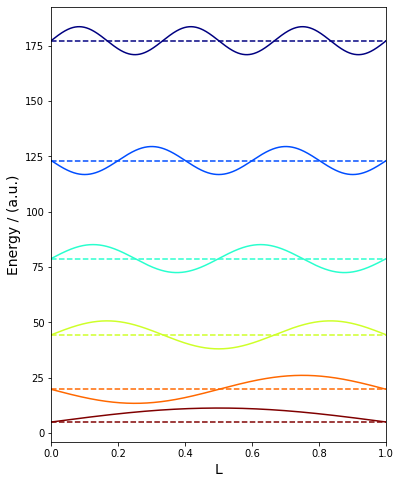

In [77]:
fig, ax = plt.subplots(figsize=(6,8))
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax.plot(xvec, v*2e2+ E[i], c=color)
    ax.axhline(E[i], c=color, ls='--')
ax.set_xlim(xvec[0], xvec[-1])
ax.set_xlabel('L', fontsize=14)
# set y label
ax.set_ylabel('Energy / (a.u.)', fontsize=14)

Text(0.5, 0, 'L')

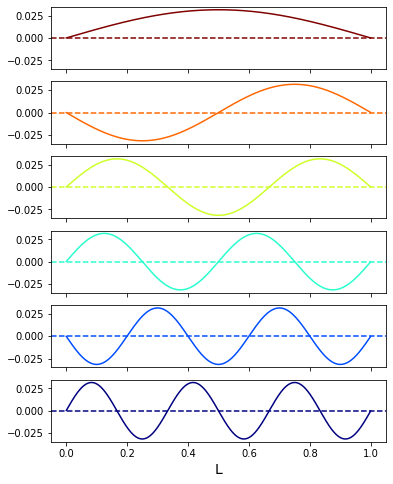

In [85]:
fig, ax = plt.subplots(n, figsize=(6,8), sharex=True, sharey=True)
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax[i].plot(xvec, v, c=color)
    ax[i].axhline(0, c=color, ls='--')
#ax[-1].set_xlim(xvec[0], xvec[-1])
ax[-1].set_xlabel('L', fontsize=14)
# set y label
#ax.set_ylabel('Energy / (a.u.)', fontsize=14)

Text(0.5, 0, 'L')

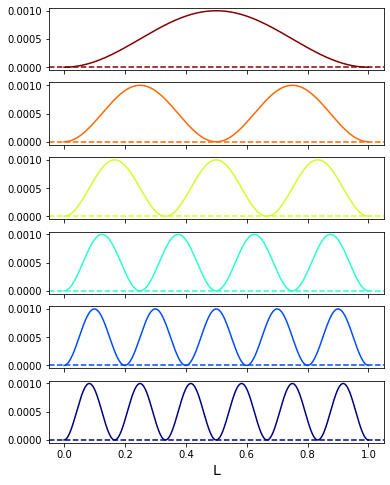

In [86]:
fig, ax = plt.subplots(n, figsize=(6,8), sharex=True, sharey=True)
for i, v in enumerate(V.transpose()[:n]):
    #V_new, ScaleFactor = infinite_well_plot_scaling(E,V,xvec,W)
    color=mpl.cm.jet_r((i)/(float)(n-1),1)
    ax[i].plot(xvec, v**2, c=color)
    ax[i].axhline(0, c=color, ls='--')
#ax[-1].set_xlim(xvec[0], xvec[-1])
ax[-1].set_xlabel('L', fontsize=14)
# set y label
#ax.set_ylabel('Energy / (a.u.)', fontsize=14)

### Preguntas
1. ¿Cuáles son las variables que usamos como input en el programa? ¿Qué sucede al modificar $h$ y disminuir así la precisión de la discretización?

1. ¿Qué les pasa a los niveles energéticos al aumentar la anchura del potencial?

2. ¿Qué le sucede al espaciado de las funciones de onda según va aumentando la energía?

3. ¿Cuál es la regla general para le número de nodos que se observan en la función de onda?

4. Calcula la densidad de probabilidad a partir de las funciones propias.